In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt

import datetime
import json
import pickle


In [2]:
def get_soup(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    return page.status_code, soup

def get_date(soup, d, country_name, table_id=2, eb_id=1):
    tables = []
    for tb in soup.find_all('table'):
        rows = tb.find_all('tr')
        if len(rows)>3:
            data = []
            for row in rows:
                cols = row.find_all('td')
                cols = [ele.text.strip() for ele in cols]
                data.append([ele for ele in cols if ele])
            tables.append(data)
    
    wanted_table = tables[table_id]
    country_list = [c.replace('\n ','').lower() for c in wanted_table[0]]
    country_name = country_name.lower()
    country_ind = [i for i,c in enumerate(country_list) if country_name in c]
    country_id = country_ind[0]
    res = wanted_table[eb_id][country_id]
    
    if res=='C':
        res_d = d
    elif res=='U':
        res_d = ''
    else:
        DD = int(res[:2])
        MON = res[2:5]
        YYYY = 2000+int(res[-2:])
        if YYYY>2030:
            YYYY-=1000
        MM = M_abbr.index(MON)+1
        res_d = datetime.date(YYYY,MM,DD)
    return res_d

In [3]:
M=['january','february','march','april','may','june','july','august','september','october','november','december']
M_abbr = [a[:3].upper() for a in M]

In [4]:
eb_id = 3

In [5]:
x1 = []
row_days1 = []
cn_days1 = []
in_days1 = []

for yr in [2015, 2016, 2017, 2018, 2019, 2020]:
    bd, ed = 0, 12
    if yr==2015:
        bd=9
    if yr==2020:
        ed=5
    for i in range(bd, ed):
        m = M[i]
        fy = yr if i<9 else yr+1
        url = 'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{}/visa-bulletin-for-{}-{}.html'.format(fy, m, yr)
        s, soup = get_soup(url)
        if s==404:
            url = 'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{}/visa-bulletin-{}-{}.html'.format(fy,m,yr)
            s, soup = get_soup(url)            
        
        d = datetime.date(yr, i+1, 1)

        try:
            res_ROW   = get_date(soup,d,'all', table_id=2, eb_id=eb_id)
            res_CHINA = get_date(soup,d,'china', table_id=2, eb_id=eb_id)
            res_INDIA = get_date(soup,d,'india', table_id=2, eb_id=eb_id)
        except:
            break
            
        x1.append(d)
        row_days1.append(res_ROW)
        cn_days1.append(res_CHINA)
        in_days1.append(res_INDIA)
        
        print(d,' ',res_ROW, res_CHINA, res_INDIA)
    #break
        
        

(datetime.date(2015, 10, 1), ' ', datetime.date(2015, 8, 15), datetime.date(2011, 10, 15), datetime.date(2004, 3, 8))
(datetime.date(2015, 11, 1), ' ', datetime.date(2015, 8, 15), datetime.date(2012, 1, 1), datetime.date(2004, 4, 1))
(datetime.date(2015, 12, 1), ' ', datetime.date(2015, 9, 1), datetime.date(2012, 4, 15), datetime.date(2004, 4, 22))
(datetime.date(2016, 1, 1), ' ', datetime.date(2015, 10, 1), datetime.date(2012, 7, 1), datetime.date(2004, 5, 15))
(datetime.date(2016, 2, 1), ' ', datetime.date(2015, 10, 1), datetime.date(2012, 10, 1), datetime.date(2004, 6, 15))
(datetime.date(2016, 3, 1), ' ', datetime.date(2016, 1, 1), datetime.date(2013, 6, 1), datetime.date(2004, 7, 15))
(datetime.date(2016, 4, 1), ' ', datetime.date(2016, 2, 15), datetime.date(2013, 8, 15), datetime.date(2004, 8, 8))
(datetime.date(2016, 5, 1), ' ', datetime.date(2016, 2, 15), datetime.date(2013, 8, 15), datetime.date(2004, 9, 1))
(datetime.date(2016, 6, 1), ' ', datetime.date(2016, 2, 15), datetime

In [6]:
x0 = []
row_days0 = []
cn_days0 = []
in_days0 = []

for yr in range(2004,2016):
    if yr==2015:
        ed=9
    else:
        ed=12
    for i in range(0,ed):
        m = M[i]
        fy = yr if i<9 else yr+1
        url = 'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{}/visa-bulletin-for-{}-{}.html'.format(fy, m, yr)

        s, soup = get_soup(url)
        if s==404:
            url = 'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{}/visa-bulletin-{}-{}.html'.format(fy,m,yr)
            s, soup = get_soup(url)            

        d = datetime.date(yr, i+1, 1)

        try:
            res_ROW   = get_date(soup,d,'all', table_id=1, eb_id=eb_id)
            res_CHINA = get_date(soup,d,'china', table_id=1, eb_id=eb_id)
            res_INDIA = get_date(soup,d,'india', table_id=1, eb_id=eb_id)
        except:
            break
            
        x0.append(d)
        row_days0.append(res_ROW)
        cn_days0.append(res_CHINA)
        in_days0.append(res_INDIA)
        
        print(d,' ',res_ROW, res_CHINA, res_INDIA)
        
        

(datetime.date(2007, 1, 1), ' ', datetime.date(2002, 8, 1), datetime.date(2002, 8, 1), datetime.date(2001, 5, 8))
(datetime.date(2008, 1, 1), ' ', datetime.date(2002, 10, 15), datetime.date(2001, 11, 1), datetime.date(2001, 5, 1))
(datetime.date(2008, 2, 1), ' ', datetime.date(2002, 11, 1), datetime.date(2001, 11, 15), datetime.date(2001, 5, 8))
(datetime.date(2008, 3, 1), ' ', datetime.date(2005, 1, 1), datetime.date(2002, 12, 1), datetime.date(2001, 8, 1))
(datetime.date(2008, 4, 1), ' ', datetime.date(2005, 7, 1), datetime.date(2003, 2, 8), datetime.date(2001, 10, 1))
(datetime.date(2008, 5, 1), ' ', datetime.date(2006, 3, 1), datetime.date(2003, 3, 22), datetime.date(2001, 11, 1))
(datetime.date(2008, 6, 1), ' ', datetime.date(2006, 3, 1), datetime.date(2003, 3, 22), datetime.date(2001, 11, 1))
(datetime.date(2008, 7, 1), ' ', '', '', '')
(datetime.date(2008, 8, 1), ' ', '', '', '')
(datetime.date(2008, 9, 1), ' ', '', '', '')
(datetime.date(2008, 10, 1), ' ', datetime.date(2005, 1

(datetime.date(2014, 8, 1), ' ', datetime.date(2011, 4, 1), datetime.date(2008, 11, 1), datetime.date(2003, 11, 8))
(datetime.date(2014, 9, 1), ' ', datetime.date(2011, 4, 1), datetime.date(2008, 11, 1), datetime.date(2003, 11, 8))
(datetime.date(2014, 10, 1), ' ', datetime.date(2011, 10, 1), datetime.date(2009, 4, 1), datetime.date(2003, 11, 15))
(datetime.date(2014, 11, 1), ' ', datetime.date(2012, 6, 1), datetime.date(2010, 1, 1), datetime.date(2003, 11, 22))
(datetime.date(2014, 12, 1), ' ', datetime.date(2012, 11, 1), datetime.date(2010, 6, 1), datetime.date(2003, 12, 1))
(datetime.date(2015, 1, 1), ' ', datetime.date(2013, 6, 1), datetime.date(2011, 3, 1), datetime.date(2003, 12, 15))
(datetime.date(2015, 2, 1), ' ', datetime.date(2014, 1, 1), datetime.date(2011, 9, 1), datetime.date(2003, 12, 22))
(datetime.date(2015, 3, 1), ' ', datetime.date(2014, 6, 1), datetime.date(2011, 10, 22), datetime.date(2004, 1, 1))
(datetime.date(2015, 4, 1), ' ', datetime.date(2014, 10, 1), datetim

In [7]:
x=x0+x1
row_days = row_days0+row_days1
cn_days = cn_days0+cn_days1
in_days = in_days0+in_days1

In [8]:
eb_fa = {'date':x,
          'Row-EB{}'.format(eb_id):row_days,
          'China-EB{}'.format(eb_id):cn_days,
          'India-EB{}'.format(eb_id):in_days}

In [9]:
df = pd.DataFrame.from_dict(eb_fa)

In [10]:
df.to_csv('./../data/eb{}_final_action_days.csv'.format(eb_id),index=False)

In [11]:
with open('./../data/eb{}_fa.pk'.format(eb_id), 'wb') as f:
    pickle.dump(df,f)

Text(0.5,1,u'EB3 Final Action Date')

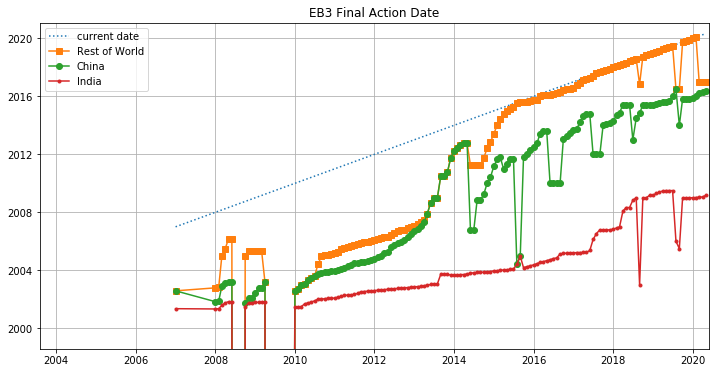

In [12]:
plt.figure(figsize=(12,6))

plt.plot_date(x,x,':',xdate = True, ydate=True,label='current date')
plt.plot_date(x,df['Row-EB{}'.format(eb_id)],'s-',xdate = True, ydate=True,label='Rest of World')
plt.plot_date(x,df['China-EB{}'.format(eb_id)],'o-',xdate = True, ydate=True,label='China')
plt.plot_date(x,df['India-EB{}'.format(eb_id)],'.-',xdate = True, ydate=True,label='India')
#plt.plot_date([datetime.date(2019,11,1),datetime.date(2020,2,1)],[datetime.date(2018,6,1),datetime.date(2018,12,1)],':',color='#ee7700')
#plt.plot_date([datetime.date(2019,11,1),datetime.date(2020,2,1)],[datetime.date(2017,2,1),datetime.date(2017,8,1)],':',color='green')
#plt.plot_date([datetime.date(2019,11,1),datetime.date(2020,2,1)],[datetime.date(2015,1,1),datetime.date(2015,1,1)],':',color='red')

ylim = [datetime.date(1998,8,1),datetime.date(2021,2,1)]
xlim = [datetime.date(2003,8,1),datetime.date(2020,6,1)]

plt.ylim(ylim)
plt.xlim(xlim)
plt.grid('on')
plt.legend()
#plt.title('Estimation of Xiang''s time line')
#plt.title('EB1 catastrophe. Table B')
plt.title('EB{} Final Action Date'.format(eb_id))

#plt.plot_date([datetime.date(2017,5,30),datetime.date(2017,5,30)],ylim,'k:')
#plt.plot_date(xlim,[datetime.date(2017,5,30),datetime.date(2017,5,30)],'k:')


In [15]:
with open('./../data/eb1_fa.pk', 'rb') as f:
    eb1_fa = pickle.load(f)
with open('./../data/eb2_fa.pk', 'rb') as f:
    eb2_fa = pickle.load(f)
with open('./../data/eb3_fa.pk', 'rb') as f:
    eb3_fa = pickle.load(f)    

Text(0.5,1,u'China EB Final Action Date')

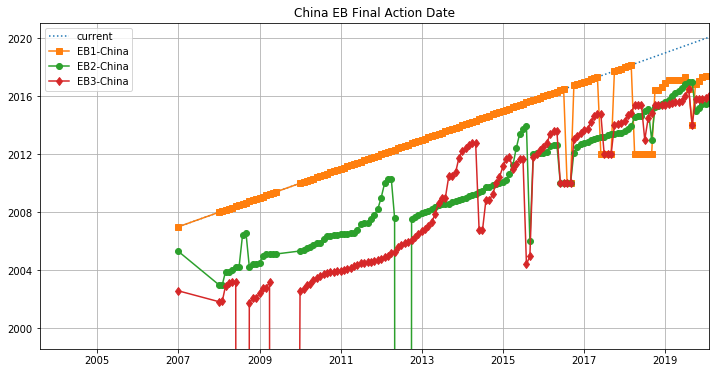

In [20]:
plt.figure(figsize=(12,6))

plt.plot_date(eb1_fa['date'],eb1_fa['date'],':',xdate = True, ydate=True,label='current')
plt.plot_date(eb1_fa['date'],eb1_fa['China-EB1'],'s-',xdate = True, ydate=True,label='EB1-China')
plt.plot_date(eb2_fa['date'],eb2_fa['China-EB2'],'o-',xdate = True, ydate=True,label='EB2-China')
plt.plot_date(eb3_fa['date'],eb3_fa['China-EB3'],'d-',xdate = True, ydate=True,label='EB3-China')

ylim = [datetime.date(1998,8,1),datetime.date(2021,2,1)]
xlim = [datetime.date(2003,8,1),datetime.date(2020,2,1)]

plt.ylim(ylim)
plt.xlim(xlim)
plt.grid('on')
plt.legend()
#plt.title('Estimation of Xiang''s time line')
#plt.title('EB1 catastrophe. Table B')
plt.title('China EB Final Action Date')

#plt.plot_date([datetime.date(2017,5,30),datetime.date(2017,5,30)],ylim,'k:')
#plt.plot_date(xlim,[datetime.date(2017,5,30),datetime.date(2017,5,30)],'k:')


In [18]:
eb1_fa

,China-EB1,India-EB1,Row-EB1,date
0,2007-01-01,2007-01-01,2007-01-01,2007-01-01
1,2008-01-01,2008-01-01,2008-01-01,2008-01-01
2,2008-02-01,2008-02-01,2008-02-01,2008-02-01
3,2008-03-01,2008-03-01,2008-03-01,2008-03-01
4,2008-04-01,2008-04-01,2008-04-01,2008-04-01
5,2008-05-01,2008-05-01,2008-05-01,2008-05-01
6,2008-06-01,2008-06-01,2008-06-01,2008-06-01
7,2008-07-01,2008-07-01,2008-07-01,2008-07-01
8,2008-08-01,2008-08-01,2008-08-01,2008-08-01
9,2008-09-01,2008-09-01,2008-09-01,2008-09-01
